# Settings

In [1]:
import os

import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [5, 2]

In [2]:
# from google.colab import drive
# drive.mount('/gdrive')
# %cd /gdrive/MyDrive/COLAB/tensorflow/1_Intro

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive/MyDrive/COLAB/tensorflow/1_Intro


# Utils

In [3]:
#@title plot_loss_acc
def plot_loss_acc(history):
  train_acc = history.history[     'accuracy' ]
  val_acc = history.history[ 'val_accuracy' ]
  train_loss = history.history[    'loss' ]
  val_loss = history.history['val_loss' ]
  epochs   = range(len(train_acc))

  # plot training and validation accuracy per epoch
  plt.subplot(1, 3, 1)
  plt.plot  ( epochs,     train_acc )
  plt.plot  ( epochs, val_acc )
  plt.title ( 'Accuracy' )

  # plot training and validation loss per epoch
  plt.subplot(1, 3, 2)
  plt.plot  ( epochs,     train_loss )
  plt.plot  ( epochs, val_loss )
  plt.title ( 'Loss' )

  # subplot for legend
  plt.subplot(1, 3, 3)
  plt.plot([], [], label='Plot 1')
  plt.plot([], [], label='Plot 2')
  plt.legend(loc='upper left')
  plt.axis('off')

  plt.tight_layout(rect=[0, 0, 2, 1])
  plt.legend(['training', 'validation'], loc='upper left')
  plt.show();

# Dataset

In [4]:
df = pd.read_csv("data/rca.csv")
df.head()

,ID,CPU_LOAD,MEMORY_LEAK_LOAD,DELAY,ERROR_1000,ERROR_1001,ERROR_1002,ERROR_1003,ROOT_CAUSE
0,1,0,0,0,0,1,0,1,MEMORY_LEAK
1,2,0,0,0,0,0,0,1,MEMORY_LEAK
2,3,0,1,1,0,0,1,1,MEMORY_LEAK
3,4,0,1,0,1,1,0,1,MEMORY_LEAK
4,5,1,1,0,1,0,1,0,NETWORK_DELAY


In [5]:
label_encoder = LabelEncoder()
df['ROOT_CAUSE'] = label_encoder.fit_transform(df['ROOT_CAUSE'])
# print(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

# convert df to a numpy vector
np_df = df.to_numpy().astype(float)

# extract feature and target variables
X = np_df[:,1:8]
Y = tf.keras.utils.to_categorical(np_df[:, 8], 3) # convert target variables to one-hot-encoding

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1)

print("Shape of feature variables :", X_train.shape)
print("Shape of target variable :",Y_train.shape)

Shape of feature variables : (900, 7)
Shape of target variable : (900, 3)


# Logistic Regression model

In [6]:
# create LogisticRegression model
model = LogisticRegression()
model.fit(X_train, np.argmax(Y_train, axis=1)) # convert one-hot-encoded values to integers

predictions = model.predict(X_test)
accuracy = (predictions == np.argmax(Y_test, axis=1)).mean()
print("Accuracy:", accuracy)

Accuracy: 0.77


In [7]:
# predict
symptoms = pd.DataFrame([[1, 0, 1, 0, 1, 1, 0]])
predicted_label = model.predict(symptoms)
predicted_cause = label_encoder.inverse_transform(predicted_label)
print("Predicted cause:", predicted_cause)

Predicted cause: ['DATABASE_ISSUE']


# DNN

In [ ]:
DENSE_1_UNITS = 32
DENSE_2_UNITS = 32
LR = 0.01


In [31]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(DENSE_1_UNITS, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(DENSE_2_UNITS, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model_1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=LR),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history_1 = model_1.fit(X_train, np.argmax(Y_train, axis=1), epochs=100, batch_size=32, validation_split=0.1)

Epoch 1/100
26/26 [==============================] - 1s 13ms/step - loss: 0.6534 - accuracy: 0.7716 - val_loss: 0.4960 - val_accuracy: 0.7556
Epoch 2/100
26/26 [==============================] - 0s 5ms/step - loss: 0.4599 - accuracy: 0.8358 - val_loss: 0.4928 - val_accuracy: 0.7667
Epoch 3/100
26/26 [==============================] - 0s 5ms/step - loss: 0.4316 - accuracy: 0.8432 - val_loss: 0.4889 - val_accuracy: 0.7778
Epoch 4/100
26/26 [==============================] - 0s 4ms/step - loss: 0.4184 - accuracy: 0.8358 - val_loss: 0.4927 - val_accuracy: 0.7667
Epoch 5/100
26/26 [==============================] - 0s 4ms/step - loss: 0.4084 - accuracy: 0.8531 - val_loss: 0.4868 - val_accuracy: 0.7667
Epoch 6/100
26/26 [==============================] - 0s 4ms/step - loss: 0.3872 - accuracy: 0.8481 - val_loss: 0.5111 - val_accuracy: 0.7889
Epoch 7/100
26/26 [==============================] - 0s 4ms/step - loss: 0.3881 - accuracy: 0.8469 - val_loss: 0.4867 - val_accuracy: 0.7778
Epoch 8/100


In [32]:
# from the course
model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(name='Dense-Layer-1', units=DENSE_1_UNITS, input_shape=(X_train.shape[1],),  activation='relu'),
    tf.keras.layers.Dense(name='Dense-Layer-2', units=DENSE_2_UNITS, activation='relu'),
    tf.keras.layers.Dense(name='Output-Layer', units=3, activation='softmax')
])
model_2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=LR),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history_2 = model_2.fit(X_train, Y_train, epochs=100, batch_size=32, validation_split=0.1)

Epoch 1/100
26/26 [==============================] - 1s 17ms/step - loss: 0.6623 - accuracy: 0.7506 - val_loss: 0.4930 - val_accuracy: 0.8111
Epoch 2/100
26/26 [==============================] - 0s 7ms/step - loss: 0.4495 - accuracy: 0.8333 - val_loss: 0.4625 - val_accuracy: 0.8444
Epoch 3/100
26/26 [==============================] - 0s 12ms/step - loss: 0.4341 - accuracy: 0.8309 - val_loss: 0.4985 - val_accuracy: 0.7667
Epoch 4/100
26/26 [==============================] - 0s 13ms/step - loss: 0.4476 - accuracy: 0.8321 - val_loss: 0.4919 - val_accuracy: 0.7556
Epoch 5/100
26/26 [==============================] - 0s 9ms/step - loss: 0.4234 - accuracy: 0.8420 - val_loss: 0.4685 - val_accuracy: 0.7889
Epoch 6/100
26/26 [==============================] - 0s 8ms/step - loss: 0.3840 - accuracy: 0.8605 - val_loss: 0.4752 - val_accuracy: 0.7889
Epoch 7/100
26/26 [==============================] - 0s 9ms/step - loss: 0.3737 - accuracy: 0.8543 - val_loss: 0.4754 - val_accuracy: 0.7667
Epoch 8/10

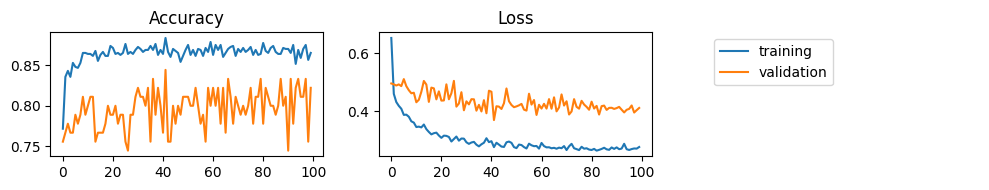

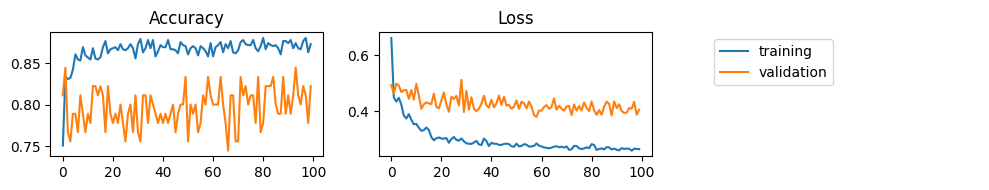

In [33]:
plot_loss_acc(history_1)
plot_loss_acc(history_2)

In [35]:
# evaluate with test data
accuracy_1 = model_1.evaluate(X_test, np.argmax(Y_test, axis=1))[1]
accuracy_2 = model_2.evaluate(X_test, Y_test)[1]
print("Accuracy 1:", accuracy_1)
print("Accuracy 2:", accuracy_2)

4/4 [==============================] - 0s 17ms/step - loss: 0.4333 - accuracy: 0.8000
Accuracy 1: 0.800000011920929
Accuracy 2: 0.800000011920929


In [37]:
# predict
CPU_LOAD=1
MEMORY_LOAD=0
DELAY=0
ERROR_1000=0
ERROR_1001=1
ERROR_1002=1
ERROR_1003=0

symptoms = np.array([[CPU_LOAD,MEMORY_LOAD,DELAY, ERROR_1000,ERROR_1001,ERROR_1002,ERROR_1003]])

predicted_cause = np.argmax(model_1.predict(symptoms), axis=-1) # argmax returns indices of max values
print("Predicted cause:", label_encoder.inverse_transform(predicted_cause))

1/1 [==============================] - 0s 415ms/step
Predicted cause: ['DATABASE_ISSUE']


In [40]:
# predict as batch
predictions = model_2.predict([
    [1,0,0,0,1,1,0],
    [0,1,1,1,0,0,0],
    [1,1,0,1,1,0,1],
])

print(label_encoder.inverse_transform(np.argmax(predictions, axis=1 )))

1/1 [==============================] - 0s 86ms/step
['DATABASE_ISSUE' 'NETWORK_DELAY' 'MEMORY_LEAK']
